<a href="https://colab.research.google.com/github/adrienloizeau/cifar-pytorch-model-/blob/main/fdl_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FDL- DSBA Assignment 2022-2023

### Please fill the blanks in the code and answer to the questions that are asked in the Jupyter Notebook ("Markdown" cell). 

### Instructions: Rename the jupyter adding your name at the end of the title FDL_Assignment-<YOUR NAME\>.ipynb

### Upload your solution on Edunao before the 19/12/2022 (December the 12th), and set the file name to FDL_Assignment-<YOUR NAME\>

For any questions, please contact Arthur Ledaguenel at arthur.ledaguenel@centralesupelec.fr and put \[FDL\] in the object of the mail

# Question 1 -  TRAIN ON CIFAR DATASET
In this exercise you are asked to train a Convolutional Neural Network (CNN) on the CIFAR10 dataset and visualize its feature maps.

## 1a) Download the CIFAR10 dataset using the already provided PyTorch dataloaders. 
*   Read and understand the following code
*   Feel free to add additional transformations of data. Explain if so. 

In [23]:
batch_size = 10

In [35]:
## Download the CIFAR10 dataset using the PyTorch dataloaders
import json 
from pprint import pprint
import torch
import torchvision
import torchvision.transforms as transforms

# *****START CODE 
## Data
##Here you are free to add further transform functions if you wish
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size= batch_size , shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
val_dataloader = torch.utils.data.DataLoader(testset, batch_size= batch_size, shuffle=False)
# *****END CODE

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


## 1b) Create your convolutional neural network.
*   Go to https://dljudge.io/generate + /<YOUR NAME\> or use curl below
*   Save the page as json 
*   Build your CNN architecture based on those modules and hyperparameters
*   Use the right value for 'COMPUTE' 
*   See the example below

In [ ]:
!curl https://dljudge.io/generate/adrienloizeau -o network1.json

In [36]:
def validate_network(model, input_dict):
    """
    Validate if your network definition is same as provided architecture
    """
    output = {}
    i = 1
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Conv2d',
                                                  'kernel_size': layer.kernel_size[0],
                                                   'input': layer.in_channels,
                                                   'output': layer.out_channels,
                                                   'padding': layer.padding[0]}

        if isinstance(layer, nn.ReLU):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'ReLU'}

        if isinstance(layer, nn.MaxPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'MaxPool2d',
                                                  'kernel_size': layer.kernel_size,
                                                  'stride': layer.stride}

        if isinstance(layer, nn.AdaptiveAvgPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'AdaptiveAvgPool2d',
                                                  'output': layer.output_size}

        if isinstance(layer, nn.BatchNorm2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'BatchNorm2d',
                                                  'input': layer.num_features}

        if isinstance(layer, nn.Dropout):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Dropout',
                                                  'p': layer.p}

        if isinstance(layer, nn.Linear):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Linear',
                                                  'input': layer.in_features,
                                                  'output': layer.out_features}

        i += 1

    
    correct = True
    for l in output.keys():
        if l in input_dict:
            inp_kvs = input_dict[l]
            out_kvs = output[l]
            for k in out_kvs:
                if inp_kvs[k] != 'COMPUTE':
                    if out_kvs[k] != inp_kvs[k]:
                        print(out_kvs[k])
                        print (f'Error in {l}, {k}!')
                        correct = False

    if correct:
        print ('OK!')

In [37]:
# *****START CODE 
# Import your individual architecture dictionnary here
fin = open('CNN.json', 'r')
my_architecture_dict = json.load(fin)
fin.close()

pprint(my_architecture_dict)
# *****END CODE

{'Layer_001': {'input': 3,
               'kernel_size': 3,
               'output': 56,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_002': {'type': 'ReLU'},
 'Layer_003': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_004': {'input': 56,
               'kernel_size': 3,
               'output': 135,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_005': {'type': 'ReLU'},
 'Layer_006': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_007': {'input': 135,
               'kernel_size': 3,
               'output': 246,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_008': {'type': 'ReLU'},
 'Layer_009': {'input': 246,
               'kernel_size': 3,
               'output': 246,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_010': {'type': 'ReLU'},
 'Layer_011': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_012': {'input': 246,
               'kernel_

### Defining the model

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNet(nn.Module):
    def __init__(self, inplanes :int, planes : int, stride = 1, downsample = None, 
                 groups = 1, base_width = 64, dilation = 1, norm_layer = None, final_images = 16):
        super(ConvNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d

        # ? 
        # width = int(planes * (base_width / 64.0)) * groups

        width = int(planes * (base_width / 64.0)) * groups

        self.conv1  = nn.Conv2d(width,56,3,padding  = 1)
        self.batch1 =nn.BatchNorm2d(56)

        self.relu1  = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2,2)

        self.conv2  = nn.Conv2d(56,135,3,padding  = 1)
        self.batch2 =nn.BatchNorm2d(135)

        self.relu2  = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2,2)
        
        self.conv3  = nn.Conv2d(135,246,3,padding  = 1)
        self.batch3 =nn.BatchNorm2d(246)
        
        self.relu3  = nn.ReLU()
        self.conv4  = nn.Conv2d(246,246,3,padding  = 1)
        
        self.batch4 =nn.BatchNorm2d(246)
        self.relu4  = nn.ReLU()
        #10 
        
        self.maxpool3 = nn.MaxPool2d(2,2)
        self.conv5  = nn.Conv2d(246,520,3,padding  = 1)
        
        self.batch5 =nn.BatchNorm2d(520)
        self.relu5  = nn.ReLU()
        
        self.conv6  = nn.Conv2d(520,520,3,padding  = 1)
        self.batch6 =nn.BatchNorm2d(520)

        self.relu6  = nn.ReLU()
        self.maxpool4 = nn.MaxPool2d(2,2)
        
        self.conv7  = nn.Conv2d(520,520,3,padding  = 1)
        self.batch7 = nn.BatchNorm2d(520)
        
        self.relu7  = nn.ReLU()
        self.conv8  = nn.Conv2d(520,520,3,padding  = 1)
        
        self.batch8 = nn.BatchNorm2d(520)
        self.relu8  = nn.ReLU()
        
        self.maxpool5 = nn.MaxPool2d(2,2)
        # Compute here set to 520 to fit the previous modules. 
        # AdaptiveAvgPool2d makes an average pooling
        self.adapt1 = nn.AdaptiveAvgPool2d(1)
        
        # Does not modify the size 
        self.dropout1 = nn.Dropout(p=0.5112472379693787)
        # We still are only with 520
        # self.flaten1 = nn.Flatten()
        self.linear1 = nn.Linear(520, 2142)
        
        self.relu9 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.5112472379693787)
        
        self.linear2 = nn.Linear(2142,3067)
        self.relu10 = nn.ReLU()

        self.dropout3 = nn.Dropout(p=0.5112472379693787)
        self.linear3 = nn.Linear(3067,3922)
        
        self.relu11 = nn.ReLU()
        
        self.linear4 = nn.Linear(3922,batch_size * planes)

        
    def forward(self, x):
        x = self.conv1(x)
        x = self.batch1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        
        x = self.batch2(x)
        x = self.relu2(x)
        
        x = self.maxpool2(x)
        x = self.conv3(x)

        x = self.batch3(x)
        x = self.relu3(x)

        x = self.conv4(x)
        x = self.batch4(x)
        
        x = self.relu4(x)
        x = self.maxpool3(x)

        x = self.conv5(x)
        x = self.batch5(x)
        
        x = self.relu5(x)
        x = self.conv6(x)
        
        x = self.batch6(x)
        x = self.relu6(x)
        
        x = self.maxpool4(x)
        x = self.conv7(x)

        x = self.batch7(x)
        x = self.relu7(x)
        
        x = self.conv8(x)
        x = self.batch8(x)

        
        x = self.relu8(x)
        x = self.maxpool5(x)
        
        x = self.adapt1(x)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        
        x = self.linear1(x)
        x = self.relu9(x)

        x = self.dropout2(x)
        x = self.linear2(x)
        
        x = self.relu10(x)
        x = self.dropout3(x)

        x = self.linear3(x)
        x = self.relu11(x)

        x = self.linear4(x)
        return x
# *****END CODE

## 1c) Create the training scheme
*    Initialize the model
*    Validate the model
*    Specify the training hyperparameters like type of optimizer, criterion and learning rate
*    Specify number of epochs
*    Connect the model and any further informations to WandB

Then train the model, doing one evaluation pass per epoch (make sure to log any interesting metric to WandB during training).

### Installing wandb

In [39]:
!pip install wandb --quiet

# Import the library
import wandb
# Then connect to your W&B account
def wandb_connect():
    wandb_api_key_label = "77e0a94a0fa993f825495a3021ebfa5477225ce9"
    wandb_api_key = "" # here use your API key from WandB interface

    wandb_conx = wandb.login(key = wandb_api_key)
    print(f"Connected to Wandb online interface : {wandb_conx}")

wandb_connect()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Connected to Wandb online interface : True


In [40]:
!pip install torchnet
import torchnet as tnt # why not use torch metrics ?

# define confusion matrix using tnt package
confusion_matrix = tnt.meter.ConfusionMeter(10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Exploring data before training

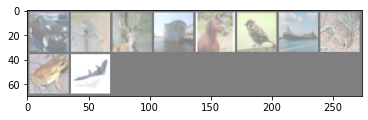

car   bird 


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


batch_size= 2
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    
# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Back to code : defining the learning rate, optimizer and criterion

In [32]:
# *****START CODE
import torch

lr = 0.01
model = ConvNet(3,3, batch_size= 10)
#validate_network(model, my_architecture_dict)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum = 0.9)
criterion = nn.CrossEntropyLoss()
epochs = 10
confusion_matrix.reset()
# *****END CODE

In [24]:
# Complete the hyperparams dict with the infos of your run
# *****START CODE
hyperparams = {"Batch size":32,
               "Learning rate":lr,
               "Epochs":epochs}
# *****END CODE

# Init the WandB run with hyperparams
wandb.init(config=hyperparams)

### First training loop

In [22]:
# Training on GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [33]:
from tqdm import tqdm
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(tqdm(train_dataloader, 0)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

  1%|          | 38/5000 [00:14<31:19,  2.64it/s]


KeyboardInterrupt: ignored

In [ ]:
# Saving the model
PATH = 'model-10.pth'
torch.save(net.state_dict(), PATH)

In [56]:
print(outputs)
print(criterion(outputs, labels))

tensor([[-0.1426,  0.9196, -0.1024,  0.5389,  0.2232,  0.0480,  0.0388,  0.2114,
         -0.0804,  0.3333,  0.0158, -0.0602,  0.2669, -0.0930, -0.1573, -0.1403,
          0.1423, -0.0308, -0.2987, -0.0271,  0.0049, -0.1397, -0.1588,  0.1229,
          0.2475, -0.1603, -0.0563, -0.2315, -0.0585, -0.2889],
        [ 0.0110,  0.9931, -0.3682,  0.6564,  0.0942,  0.1168,  0.0602,  0.1620,
         -0.1767,  0.3298, -0.0150,  0.0742, -0.1464, -0.1788,  0.1259, -0.0043,
         -0.0740, -0.1604, -0.1224, -0.3596, -0.0384, -0.2524, -0.1658,  0.0110,
          0.0055, -0.2441, -0.1090, -0.0881, -0.1346, -0.1471],
        [-0.1591,  0.9636, -0.4409,  0.6767,  0.1636,  0.0215,  0.1832,  0.4554,
         -0.1759,  0.5849,  0.1015, -0.2128, -0.0584, -0.1195, -0.1582,  0.1315,
         -0.2566, -0.1444, -0.3929, -0.2485, -0.0600, -0.2951, -0.2408, -0.1551,
          0.0102, -0.1544, -0.1824, -0.1129, -0.1445, -0.2294],
        [-0.1722,  0.7117, -0.2799,  0.3305,  0.0445, -0.0430,  0.1599,  0.5368

## 1d) Validate your model

- Show that the model is not overfitting
- How does your model perform ?

In [65]:
# define model, optimizer, criterion and number of training epochs
# *****START CODE

model = ConvNet(3,3, final_images = 16)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
epochs = 1
confusion_matrix = tnt.meter.ConfusionMeter(30) 
confusion_matrix.reset()
# *****END CODE

In [ ]:
import tqdm 

for epoch in range(epochs):
    ##TRAINING##
    model.train()
    train_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(tqdm.tqdm(train_dataloader)):
        img_batch, lbl_batch = batch

        ##implement the forward and backward backpropagation
        # *****START CODE
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        # *****END CODE

        # log the training loss at each batch
        wandb.log({"train_loss":loss.item()})
        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())

    train_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100

    ##VALIDATION##
    model.eval()
    val_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(val_dataloader):
        img_batch, lbl_batch = batch
   
        ##pass the images to the model and calculate the loss
        # *****START CODE
        with torch.no_grad():
          outputs=model(img_batch.float())
          loss=criterion(outputs, lbl_batch.long())
        # *****END CODE

        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())
        val_losses.append(loss.item())

    val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    val_loss_mean = np.mean(val_losses)

    # log the train & val accuracy and the val loss at each epoch
    wandb.log({"train_acc":train_acc, "val_acc":val_acc, "val_loss":val_loss_mean})

 95%|█████████▍| 4735/5000 [27:27<01:32,  2.88it/s]

1e) Try to optimize hyperparameters, does it improve the performance of your model ?
Anwser with a graph and comment on the result.

### Let's decrease the learning rate

lr = 0.001

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum = 0.9)




## Train the model and validate it after each epoch.
# *****START CODE

from tqdm import tqdm
import torch.nn.functional as F
total_train_losses = []
total_val_losses = []

for epoch in range(1,epochs+1):
    ##TRAINING##
    model.train()
    train_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(tqdm(train_dataloader)):
        img_batch, lbl_batch = batch

        ##implement the forward and backward backpropagation
        optimizer.zero_grad()
        outputs = model(img_batch.float())
        loss=criterion(outputs, lbl_batch.long())
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())
        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())

        if i % 100 == 0:
            print('Train (epoch {}/{}) [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, epochs, i, len(train_dataloader),100.*i/len(train_dataloader), loss.item()))

    

    train_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
        train_loss_mean = np.mean(train_losses)
        total_train_losses.append(train_loss_mean)


     ##VALIDATION##
    model.eval()
    val_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(tqdm(val_dataloader)):
        img_batch, lbl_batch = batch
   
        ##pass the images to the model and calculate the loss
        # *****START CODE
        with torch.no_grad():
          outputs=model(img_batch.float())
          loss=criterion(outputs, lbl_batch.long())
        # *****END CODE

        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())
        val_losses.append(loss.item())

    print('Confusion Matrix:')
    print(confusion_matrix.conf)

    val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    val_loss_mean = np.mean(val_losses)
    total_val_losses.append(val_loss_mean)

    print('TRAIN_LOSS: ', '%.3f' % train_loss_mean, 'TRAIN_ACC: ', '%.3f' % train_acc)
    print('VAL_LOSS: ', '%.3f' % val_loss_mean, 'VAL_ACC: ', '%.3f' % val_acc)

    write_results(save_folder, epoch, train_acc, val_acc, train_loss_mean, val_loss_mean)

    torch.save(model.state_dict(), save_folder + '/model_{}.pt'.format(epoch))

save_graph(total_train_losses, total_val_losses, epochs, save_folder)


In [ ]:
# Test pour savoir si ca marche bien ou non 

1f) Get an intermediate layer from your convolutional neural network and visualize what patterns the network has learned
*   Complete the following code that visualizes the patterns of the network
*   Write a small description commenting on the visualized maps. What do you observe in the different visualizations of the feature maps?

In [ ]:
# The intermediate layer you should visualize:
print('My intermediate layer to visualize is: %s'%(my_architecture_dict['visualize']))

In [ ]:
import sys
from skimage import io
import torchvision.utils as vutils

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv =   # e.g 64
# *****END CODE

## Size of visualised filter.
img_size = 32

##load your optimal model
# *****START CODE
model = ConvNet()
model.load_state_dict(torch.load('drive/..../model.pt')) 
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(

    
)
# *****END CODE

## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt =   #e.g 30
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE

    # *****END CODE

    ## Define optimizer.
    # *****START CODE
    
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        optimizer.zero_grad()

        ## Feedforward propagation
        ## Hint: In order to find the loss, compupte the negative of the activation of the hidden layer. 
        ## The objective is to produce an input image which maximizes the activation 
        ## of neurons in a particular hidden layer. 
        # *****START CODE
        
        
        
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()

## Make grid out of visualized filters. 
##Here you may have to adjust the properties of vutils.make_grid, depending on your needs. 
##For example, you may need to change the number of rows.
G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(10,5))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

1g) Use GradCAM algorithm to visualize the saliency maps of your trained model at the same intermediate layer
*   Install pytorch grad cam package if needed (https://github.com/jacobgil/pytorch-grad-cam)
*   Complete the following code that visualizes GradCAM heatmaps on an input image from your model
*   Try on several input images / classes. 
*   Write a small description commenting on the visualized heatmaps. 

In [ ]:
# Install pytorch grad cam package
'''UNCOMMENT IF NEEDED (using google colab for example)
! pip install grad-cam
'''


In [ ]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
use_cuda = True

# *****START CODE
model = ConvNet()
model.load_state_dict(torch.load('drive/..../model.pt'))

# Get your intermediate layer
target_layers = [model. ...]

rgb_img = 
input_tensor = # Create an input tensor from your image for your model..
# Note: input_tensor can be a batch tensor with several images!
target_category = 
# *****END CODE

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=use_cuda)

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# Plot figure
plt.figure()
plt.imshow(visualization)

### Question 2 - Train on geometrical shapes

Function 'generate_a_triangle' produces images depicting random triangles along with the (x,y) coordinates of the vertices. Create a convolutional neural network that receives as input the triangle image and predicts the corresponding (x,y) coordinates of the triangle's vertices. 
*  Read and understand the following code

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle():
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata = generate_a_drawing(figsize, U, V)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

[im, v] = generate_a_triangle()
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def generate_dataset_regression(nb_samples):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle()
    X = X / 255
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300)
    return [X_test, Y_test]

2a) Use function 'generate_dataset_regression' to create the dataset. Split the dataset to training and validation parts.

In [ ]:
##generate dataset
# *****START CODE

# *****END CODE

In [ ]:
##split the dataset to training and validation parts
# *****START CODE

# *****END CODE

2b) Use function 'generate_test_set' to create the testing dataset.

In [ ]:
##generate test dataset
# *****START CODE

# *****END CODE

2c) Create your own convolutional neural network.
* Begin with the previous exercise model architecture
* Optimize the architecture to perform well on predicting the different coordinates

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNetR(nn.Module):
    def __init__(self):
        super(ConvNetR, self).__init__()



    def forward(self, x):


# *****END CODE

2d) Define learning rate, model, optimizer, criterion and number of epochs.

In [ ]:
# *****START CODE
lr = 
model = 
optimizer = 
criterion = 
epochs = 
# *****END CODE

2e) What criterion did you choose and why?
* Write a small description for the loss function that you want to use for this specific problem.
* What was your intuition for using this loss?

2f) Train your model and validate it at the end of each epoch.
* Similarly to the previous question train and validate your network for each epoch
* Write a small description on how you decide which is the optimal epoch
* Use this epoch and evaluate your model on the test set
* Visualise some predictions using the function 'visualize_prediction'
* What do you observe?

In [ ]:
# *****START CODE



# *****END CODE

2g) Think and implement a preprocessing step that can boost the accuracy of your network

In [ ]:
# *****START CODE



# *****END CODE

#Question 3
Answer these generic questions:

3a) What is a metric? What is a loss? What is the difference between both?

Your answer:

3b) Why deep learning models are difficult to understand even on a particular prediction?

Your answer:

3c) What is "out of domain data"?

Your answer:

3d) Name five tasks where Deep Learning models are the state-of-the-art:
For example: Folding proteins in Biology

Your answer:

3e)What is an “activation function” and what is it used for in Deep Learning models?

Your answer: